In [358]:
import pandas as pd
import numpy as np
import math
from datetime import date

%matplotlib inline

In [339]:
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df = df.drop('Lat', axis=1)
df = df.drop('Long', axis=1)

In [340]:
def build_sub_df(country=None, state=None, limit=100, days=None):
    if country:
        group_by_key = 'Country/Region'
        name = country
    elif state:
        group_by_key = 'Province/State'
        name = state
    
    sub_df = df[df[group_by_key].str.lower() == name.lower()].groupby(group_by_key).sum()
    sub_df = sub_df.T
    sub_df = sub_df[sub_df > limit].dropna().reset_index()
    sub_df = sub_df.drop('index', axis=1)
    sub_df = sub_df[:days]

    return sub_df


def build_dataset(regions=None, states=None, limit=100, days=None):
    dfs = []
    if regions:
        dfs.extend([build_sub_df(country=country, limit=limit, days=days) for country in regions])
    if states:
        dfs.extend([build_sub_df(state=state, limit=limit, days=days) for state in states])

    return pd.concat(dfs, axis=1)

In [350]:
countries = ['canada', 'italy', 'Korea, South', 'US']
states = ['california']
group_df = build_dataset(countries, states)
group_df['Canada'][7] = 596 # latest data from today not in this data set 

Text(0.5, 1.0, 'Log # Cases vs Days Since 100th Case \n(2020-03-17)')

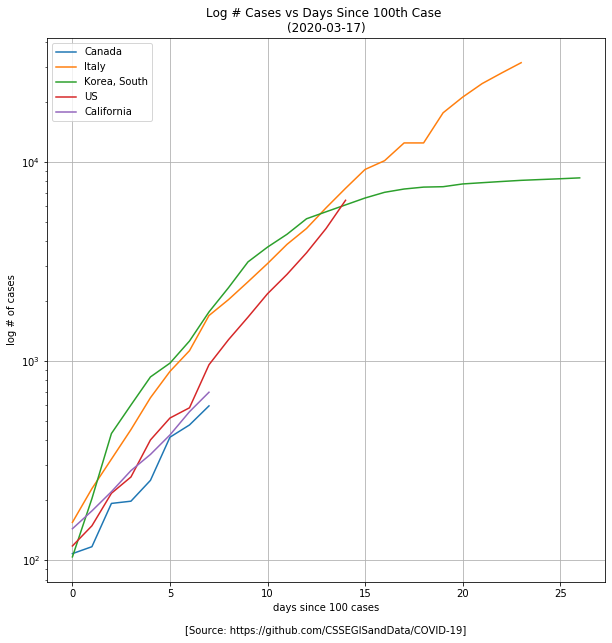

In [357]:
ax = group_df.plot(figsize=(10, 10))
ax.set_xlabel("days since 100 cases\n\n[Source: https://github.com/CSSEGISandData/COVID-19]")
ax.set_ylabel("log # of cases")
ax.set_yscale('log')
ax.grid()
ax.set_title(f'Log # Cases vs Days Since 100th Case \n({date.today()})')
